# Exploring NetCDF (*.nc) files
In this notebook we examine how the `xarray` package works with multidimensional NetCDF (`*.nc`) files. We discuss the structure and components of a NetCDF file (dimensions, variables, indexes, and attributes), as well as how to extract and summarize data across dimensions and variables held in the dataset.  

The dataset we'll use comes from NOAA's [Hindcast and Reanalysis Archives - Phase 2](https://polar.ncep.noaa.gov/waves/hindcasts/nopp-phase2.php).  

Specifically, we are using 10m partition data from January 1979 for the Mediterranean Sea ([link](https://polar.ncep.noaa.gov/waves/hindcasts/nopp-phase2/197901/partitions)). This [dataset](https://polar.ncep.noaa.gov/waves/hindcasts/nopp-phase2/197901/partitions/multi_reanal.partition.med_10m.197901.nc) will be available on the mapped class drive at `U:\859_data\multi_reanal.partition.med_10m.197901.nc`

In [1]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

## Read the NetCDF file into an `xarray` **dataset** object.
We begin creating an XArray **dataset** object from the NetCDF file. The dataset object is a container for all the data with methods to explore and access the data within. 

> `open_dataset()` vs `load_dataset()`:  
You can read data into a dataset object using either `open_dataset()` vs `load_dataset()`. The difference is that `open_dataset()` "lazy loads" the data, meaning it simply connects to the data such that data can be accessed *on-demand*; `load_dataset()`, on the other hand, reads the full dataset into your computers memory. 

In [59]:
# Set path to nc filed and import as an xarray dataset, then show the dataset object
nc_file = "U:\859_data\multi_reanal.partition.med_10m.197901.nc"
ds = xr.open_dataset(nc_file)
ds

<xarray.Dataset> Size: 8GB
Dimensions:                  (date: 745, longitude: 301, latitude: 109,
                              partition: 11)
Coordinates:
  * date                     (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude                (longitude) float32 1kB -7.0 -6.833 ... 42.83 43.0
  * latitude                 (latitude) float32 436B 30.0 30.17 ... 47.83 48.0
  * partition                (partition) int32 44B -2147483647 ... -2147483647
Data variables:
    depth                    (latitude, longitude) float32 131kB ...
    wind_speed               (date, latitude, longitude) float32 98MB ...
    wind_direction           (date, latitude, longitude) float32 98MB ...
    current_speed            (date, latitude, longitude) float32 98MB ...
    current_direction        (date, latitude, longitude) float32 98MB ...
    significant_wave_height  (date, partition, latitude, longitude) float32 1GB ...
    peak_period              (date, partition, latitude, longitude) timedelta64[ns] 2GB ...
    wavelength               (date, partition, latitude, longitude) float32 1GB ...
    wave_direction           (date, partition, latitude, longitude) float32 1GB ...
    direction_spreading      (date, partition, latitude, longitude) float32 1GB ...
    wind_sea_fraction        (date, partition, latitude, longitude) float32 1GB ...
Attributes:
    title:          WAVEWATCH III version 5.08
    institution:    National Centers for Environmental Prediction
    source:         WAVEWATCH III partition file
    experiment:     CFSRR Phase 2
    history:        part2nc
    field_type:     instantaneous
    forecast_type:  hindcast

## What's in a Dataset?
The dataset object contains many data arrays, each associated with a ***variable*** and each having multiple ***dimensions***.  


### ➡️Variables
Let's begin by exploring the variables in our datset. Use the `data_vars` function to list the variables in the dataset.

In [4]:
#List the variables in the dataset
ds.data_vars

Data variables:
    depth                    (latitude, longitude) float32 131kB ...
    wind_speed               (date, latitude, longitude) float32 98MB ...
    wind_direction           (date, latitude, longitude) float32 98MB ...
    current_speed            (date, latitude, longitude) float32 98MB ...
    current_direction        (date, latitude, longitude) float32 98MB ...
    significant_wave_height  (date, partition, latitude, longitude) float32 1GB ...
    peak_period              (date, partition, latitude, longitude) timedelta64[ns] 2GB ...
    wavelength               (date, partition, latitude, longitude) float32 1GB ...
    wave_direction           (date, partition, latitude, longitude) float32 1GB ...
    direction_spreading      (date, partition, latitude, longitude) float32 1GB ...
    wind_sea_fraction        (date, partition, latitude, longitude) float32 1GB ...

We work with a specific variable by extracting it into its own ***data array*** object

In [33]:
#Extract the depth variable into a data array
da_depth = ds['depth']
type(da_depth)

xarray.core.dataarray.DataArray

In [9]:
#Examine properties the depth data array
da_depth

<xarray.DataArray 'depth' (latitude: 109, longitude: 301)> Size: 131kB
[32809 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
Attributes:
    units:    m

A data array shares much of the same structure of the XArray dataset from which it was extracted, but the data array includes just one set of values - those related to the variable we selected.  

Note, however, that the `depth` variable only has two dimensions (latitude & longitude); the `date` and `partition` dimensions have dropped off. Thus, **not all variables include values along all dimensions**, which makes sense as ocean depth shouldn't change [significantly] over time or over how we measure the wave properties (partition).

##### 🫵 TASK: Create a data array from the `wind_speed` variable. How many dimensions does it have?

In [30]:
#Extract the wind-speed variable and show its dimensions
ds['wind_speed']

<xarray.DataArray 'wind_speed' (date: 745, latitude: 109, longitude: 301)> Size: 98MB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
Attributes:
    units:    meters/sec

We can extract properties and values from a data array as follows:

In [31]:
#Properties of a data array
print("Name:     \t",da_depth.name)
print("Units:    \t",da_depth.units)
print("Data Type:\t",da_depth.dtype)
print("Dimensions\t",da_depth.dims)

Name:     	 wind_speed
Units:    	 meters/sec
Data Type:	 float32
Dimensions	 ('date', 'latitude', 'longitude')


In [34]:
#Values from a data array - depth has many missing values
da_depth.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

Like numpy arrays, we can extract values using index locations. (We'll return to more sophisticated ways of doing this later...)

In [35]:
#Extract depth at a specific row, column of the data array
da_depth.values[55,66]

1928.0

##### 🫵TASK: The wind speed data array has 3 dimensions. Show that the wind speed at the location 1, 55, 66 of the data array is 12.1 m/s


In [48]:
#Get the wind speed at the locatio 1,55,66
ds['wind_speed'].values[1,55,66], ds['wind_speed'].units

(12.1, 'meters/sec')

---
### ➡️Dimensions

In the above exploration of the two-dimension depth data array, we extracted the value at position `(55, 66)`. We've worked with NumPy arrays, and this is nothing new. As an XArray data array, however, the dimensions are explicitly named. Furthermore, XArray offers methods to work with these dimensions that go beyond what NumPy can do.  

Let's begin with the `.dims` property of an Xarray dataset (or data array), which reveals the dimensions associated with it.

In [55]:
#Reveal the dimensions of the dataset
ds.dims

FrozenMappingWarningOnValuesAccess({'date': 745, 'longitude': 301, 'latitude': 109, 'partition': 11})

🔔 *The `FrozenMappingWarningOnValuesAccess` is simply a notice that we cannot change these dimensions in our dataset object.*

In [56]:
#Reveal the dimensions of the depth data array
da_depth.dims

('latitude', 'longitude')

#### Coordinate variables
The **dimensions** define the *axes* along which data values can be extracted. The *positions* along these axes where data are stored as ***coordinate variables***. For example, our dataset has a `date` dimension; the actual dates for which we have data along the `date` dimensions are its coordinate variables. 

The `.coords` property reveals what some of these coordinate variables look like, e.g. the time stamps along the date dimension, geographic coordinates along the latitude and longitude dimensions, etc

In [58]:
#Show the coordinate variables associated with the dataset
ds.coords

Coordinates:
  * date       (date) float64 6kB 3.287e+03 3.287e+03 ... 3.318e+03 3.318e+03
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
  * partition  (partition) int32 44B -2147483647 -2147483647 ... -2147483647

🔔 *The `partition` dimension's coordinate values of -2147483647 indicate they are all null. Likely this is because the partitions are purely lables, with no inherent meaning defined in the dataset.*

In [52]:
#Show the coordinate variables associated with the depth data array
da_depth.coords

Coordinates:
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0

Coordinate variables are useful to know, as they give us a more informed way of extracting values from our data arrays. We'll revisit this, but here's a quick preview

In [67]:
#Show the first 5 values long the date axis
ds.coords['date'].values[:5]

array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', '1979-01-01T03:00:00.000000000',
       '1979-01-01T04:00:00.000000000'], dtype='datetime64[ns]')

In [76]:
#From the wind-speed variable, select records from Jan 1st, 1979 at 2am
wind_speed_Jan2_2pm = ds['wind_speed'].sel(date='1979-01-01T02:00:00.000000000')
wind_speed_Jan2_2pm

<xarray.DataArray 'wind_speed' (latitude: 109, longitude: 301)> Size: 131kB
[32809 values with dtype=float32]
Coordinates:
    date       datetime64[ns] 8B 1979-01-01T02:00:00
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
Attributes:
    units:    meters/sec

Our result has all values for the specified time slice, but it still has values along the latitude and longitude dimensions since we didn't select those. That can be useful though, e.g. for plotting a map:

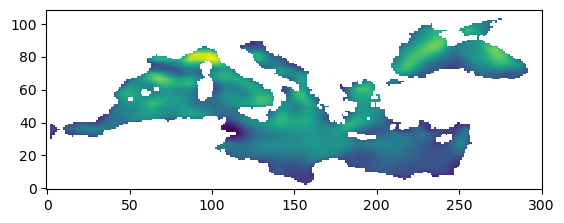

In [79]:
#Plot the result
plt.imshow(wind_speed_Jan2_2pm,origin='lower');

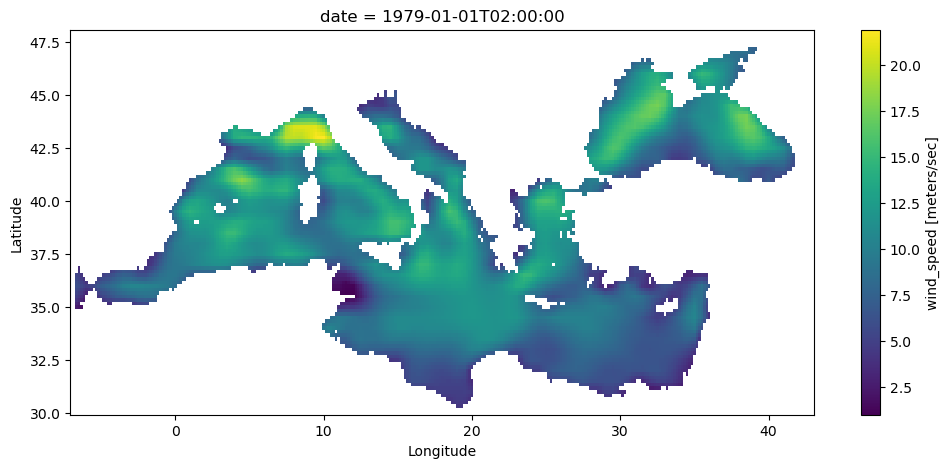

In [88]:
# Plot the data geographically
fig, ax = plt.subplots(figsize=(12,5))

# Use xarray's pcolormesh backend and tell it which coords to use
im = wind_speed_Jan2_2pm.plot.pcolormesh(x='longitude', y='latitude', ax=ax,
                        add_colorbar=True, cmap='viridis')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

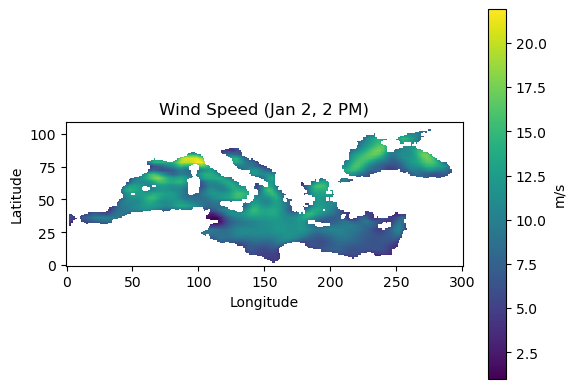

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(
    wind_speed_Jan2_2pm,
    origin='lower',
    #extent=[lon_min, lon_max, lat_min, lat_max],
    cmap='viridis'
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Wind Speed (Jan 2, 2 PM)")
ax.set_aspect('equal')
plt.colorbar(im, ax=ax, label='m/s')
plt.show()

---
---
---
---
---
**Dimensions** define the axes or coordinate lengths that structure the dataset. In GIS, we are used to 2-dimensional datasets, e.g., the typical raster dataset, where values are associated with x and y geographic coordinates. But datasets can have additional dimensions. For example, if we have a separate raster for different time and depths, we'd have a 4 dimensional dataset. 

Our data has 4 dimensions:

In [50]:
#Reveal the dimensions of the dataset
ds.coords

Coordinates:
  * date       (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
  * partition  (partition) int32 44B -2147483647 -2147483647 ... -2147483647

* There are **745 *time* steps** (`date: 745`)
* Each time step includes data for **301** points of ***latitude*** and **109** points of ***longitude*** (`longitude: 301, latitude: 109`)
* Each location at each time step is associated with **11 *partitions*** (`partition: 11`)

>  While the first three dimensions are intuitive, the fourth dimension, "partition", is specific to this dataset. Partitions refer to different spectral components of oceanic waves ([source](https://polar.ncep.noaa.gov/waves/workshop/pdfs/WW3-workshop-exercises-day4-wavetracking.pdf?utm_source=chatgpt.com)). For our purposes, we don't need to get into much detail beyond that; instead, perhaps just imagine that this dataset was collected by a set of 11 different sensor types, and the "partition" dimension represents data collected by each of these different sensors. 

In short, dimensions describe how the dataset is organized — e.g., time, space, or ensemble members. You could perhaps think of dimensions as the *axes of a multidimensional spreadsheet*.

### ➡️Coordinate Variables
Coordinate variables contain the values along each dimension.

In [54]:
#Reveal the coordinate variables
da_depth.dims

('latitude', 'longitude')

In [ ]:
#Extract values along a specific dimension
ds.coords['date']

### ➡️Data Variables

Data variables are the core measured or modeled quantities — the actual “data fields” stored along the dataset’s dimensions. 

In [ ]:
#Reveal the data variables of the dataset
ds.data_vars

Each data variable changes along on one or more dimensions.
For instance:
```python
depth(latitude, longitude)
significant_wave_height(date, partition, latitude, longitude)
```
* **depth** varies latitude and longitude, but it does not vary over time or by partition.
* **significant_wave_height** varies over date, location, and partition, so it’s a 4D variable: wave height for each partition of the spectrum at each time and location.

> Each variable is like a column in a data table, but in multiple dimensions.

### ➡️Indexes
While *dimensions* describe the axes along which our data are organized, *indexes* specify the measures along those axes — like labels for time, space, or category.

In [ ]:
#Reveal the indices of the dataset
ds.indexes

The above output shows the index values associated with each dimensions. 

For example, 
* The `date` dimension has an index for each hour from midnight on Jan 1, 1979 to midnight on Feb 1, 1979.
* The `longitude` dimension has 301 values that span from 7°W to 43°E.
* The `latitude` dimension has 109 values that span from 30°N to 48°N.
* The `partition` dimension has no meaningful index values.

We can use these index values to extract data in meaningful ways, e.g. by time and location. 

#### ➡️Attributes (Metadata)
Attributes are descriptive metadata — they provide context about the dataset or variables but don’t affect the data structure.

In [ ]:
#Reveal the attributes of the dataset
ds.attrs

These tell you:
* What the data represents (a hindcast from WAVEWATCH III).
* Where it came from (NCEP, CFSRR project).
* How it was produced (part2nc = partition-to-NetCDF conversion).
Each variable may also have its own attributes (e.g., units, standard names).
>Attributes are like the notes on the spreadsheet explaining what the numbers mean.

---
## Selecting data from the dataset
Now we'll look into how to extract, and in some cases summarize data in our dataset. First, we'll look at how to isolate and examine a single variable in our dataset. Then we'll see how we can extract values by index *position* along the different dimensions, and finally how to extract values by index *values* along the different dimensions.

### 🔍Isolating data for a specific specific *variable*
We can subset our Xarray dataset for just values related to a specific variable by calling that variable as so:

In [ ]:
#List the variables in the dataset
ds.data_vars

In [ ]:
#Select only depth records into a data array object
arr_depth = ds['depth']
type(arr_depth)

As you see, this creates an XArray `data array` object. Calling that object reveals information about its structure.

In [ ]:
#Display info on the depth data array
arr_depth

The data array object is similar to the dataset, but only retains values related to the variable. **However**, not all variables include all dimensions. For example, the `depth` variable does not have a `date` or `partition` dimension, which makes sense: it does not vary [much] across time or partition, just location. 

In [ ]:
#Show dimensions for the depth array
arr_depth.dims

The `wave_direction`, however, does include data in all the four dimensions...

In [ ]:
#Show dimensions for the wave direction array
ds['wave_direction'].dims

### 🔍Selecting data from a dataset with `.isel()`
Now, we'll focus on working with data in a data array. 

We'll begin with the `.isel()` function. This functions allows us to select values from our dataset via their *integer position* along each dimension. For, example, the value in the `wave_direction` variable at the 5th positition along the `date` axis, the 63rd position along the `latitude` axis, the 68th position along the `longitude` axis and in the 1st `partition` is **272.41 degrees**. (Note, the `values` statement returns the value(s) held in the array.)

>How do we know the value is in degrees? Have a look at the data array object: it reports the units...

In [ ]:
#Show the value at the 5th date, 63rd latitude, 68th longitude, 1st partition
ds['wave_direction'].isel(
    date=4,
    latitude=62,
    longitude=67,
    partition=0
).values

If we omit any of the dimensions (or just comment them out), the `isel()` function will return all values in the ommitted dimension.  

Here we see that, in the `wave_direction` variable, only two of the 12 partitions have values (at the specified time and spatial coordinate).

In [ ]:
#Show the value at the 5th date, 63rd latitude, 68th longitude, all partition
ds['wave_direction'].isel(
    date = 4,
    latitude=62,
    longitude=67, 
    #partition=0
).values

If we omit the spatial coordinates, we get data along all the lat/long pairs for a set time and partition, i.e., a spatial dataset which we can plot.

In [ ]:
#Save the value at the 5th date, 1st partition, all latitudes and longitudes to a variable
spatial_slice = ds['wave_direction'].isel(
    date = 4,
    #latitude=62,
    #longitude=67, 
    partition=0
).values

In [ ]:
#Plot the 2D array
plt.imshow(spatial_slice, cmap='viridis')

And yes, if we omit the time dimension, we can plot a time series for a specific location and partition.

In [ ]:
#Save a time series at 63rd latitude, 68th longitude, 1st partition to a variable
time_series = ds['wave_direction'].isel(
    #date = 4,
    latitude=62,
    longitude=67, 
    partition=0
).values

In [ ]:
#Create a simple line plot of the time series
plt.plot(time_series);

We can also request multiple values along a dimension by providing a list of indices:

In [ ]:
#Show the value at the 5th & 8th date, 63rd latitude, 68th longitude, 1st & 2nd partition
ds['wave_direction'].isel(
    date = [4,7],
    latitude=63,
    longitude=68,
    partition = [0,1]
).values

And we can extract a slice of values using the range function:

In [ ]:
#Show the value at the 5th & 8th date, 63rd latitude, 68th longitude, 1st & 2nd partition
ds['wave_direction'].isel(
    date = range(4,8),
    latitude=63,
    longitude=68,
    partition = [0,1]
).values

### Selecting values by *index* with `.sel()`
Selecting by index location is effective, but we often want to select values by index *values*: a specific time or time range, or a specific location or geographic area. We can do what with the `.sel()` function, but doing so requires us to know the values and formats of our indexes.  Some values are intuitive, like values in the `date` dimension, but others may require more knowledge of the datasets structure.  

#### Revealing the values within an index


In [ ]:
#Show the first 10 values in the date index
ds['date'][:10].values

In [ ]:
ds['date']

In [ ]:
#Show the min and max values date in the date dimension
print(ds['date'].values.min(), ds['date'].values.max())

A more efficient method of generating summary stats of index values along a dimension is to convert the values to a Pandas dataframe and then use the `describe()` function.

In [ ]:
#Generate summary stats via Pandas' dataframe
pd.DataFrame(ds['date'].values).describe()

Looking at the date index values, we see they are datetime objects of hourly increments from Jan 1, 1979 to Jan 30, 1979.


In [ ]:
#Show the 
ds['longitude'].values.min(), ds['longitude'].values.max()

In [ ]:
pd.DataFrame(ds['longitude'].values).describe()

In [ ]:
ds['wave_direction']['partition']

In [ ]:

lon = ds.longitude.isel(date=0)
lat = ds.latitude.isel(date=0)
depth = ds.depth.isel(date=0)

coord_table = pd.DataFrame({
    'gridpoint': ds.gridpoint.values,
    'longitude': lon.values,
    'latitude': lat.values,
    'depth': depth.values
})

coord_table.head()

In [ ]:
ds = xr.open_dataset(Path.cwd().parent /'data'/'raw'/'nwio_10m.nc')
ds